<a href="https://colab.research.google.com/github/dbaccarat/dio-python-pandas/blob/main/analise_passaportes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de emissoes de passaportes

Fonte: https://servicos.dpf.gov.br/dadosabertos/SINPA/


In [1]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [5]:
#cria dataframe
df = pd.read_csv("QUANTIDADE_PASSAPORTES.csv", sep=";")

In [6]:
#le as primeiras 5 linhas
df.head()

,ANO,MES,UF,TIPO_PASSAPORTE,QTD
0,2007,2,GO,PASSAPORTE DE EMERGÊNCIA - NÃO ICAO,1
1,2007,3,GO,PASSAPORTE DE EMERGÊNCIA - NÃO ICAO,5
2,2007,4,GO,PASSAPORTE DE EMERGÊNCIA - NÃO ICAO,2
3,2007,9,GO,PASSAPORTE COMUM - ICAO,1
4,2008,6,AC,PASSAPORTE COMUM - ICAO,8


In [8]:
#total de linhas e colunas
df.shape

(9592, 5)

In [11]:
#tipos de dados
df.dtypes

ANO                 int64
MES                 int64
UF                 object
TIPO_PASSAPORTE    object
QTD                 int64
dtype: object

In [13]:
#verifica se tem dados faltantes
df.isnull().sum()

ANO                0
MES                0
UF                 0
TIPO_PASSAPORTE    0
QTD                0
dtype: int64

In [10]:
#total de passaportes emitidos
df["QTD"].sum()

26356875

In [126]:
#total por ano
df.groupby("ANO")["QTD"].sum()

ANO
2007          9
2008     555418
2009    1144094
2010    1587179
2011    2103094
2012    1943282
2013    2130995
2014    2280287
2015    2299335
2016    2249702
2017    2561838
2018    2894306
2019    2985999
2020    1030660
2021     590677
Name: QTD, dtype: int64

In [27]:
#total por tipo de passaporte, resetando index e ordenando por total
total_tipo = df.groupby("TIPO_PASSAPORTE")["QTD"].sum().sort_values(ascending=False).reset_index()
total_tipo

,TIPO_PASSAPORTE,QTD
0,PASSAPORTE COMUM - ICAO,26249715
1,PASSAPORTE DE EMERGÊNCIA - NÃO ICAO,58525
2,PASSAPORTE DE EMERGÊNCIA - ICAO,41351
3,PASSAPORTE PARA ESTRANGEIRO - ICAO,3909
4,LAISSEZ-PASSER - ICAO,1676
5,LAISSEZ-PASSER - NÃO ICAO,1193
6,PASSAPORTE PARA ESTRANGEIRO - NÃO ICAO,506


Text(0, 0.5, 'Estado')

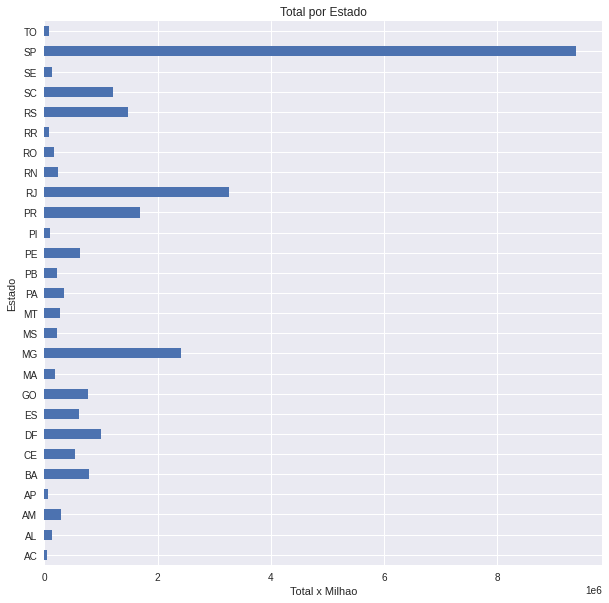

In [108]:
#grafico total por estado
df.groupby(["UF"])["QTD"].sum().plot.barh(title="Total por Estado", figsize=(10, 10))
plt.xlabel("Total x Milhao")
plt.ylabel("Estado")

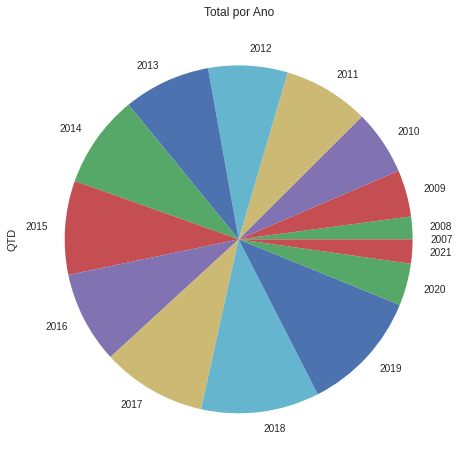

In [113]:
#grafico total por ano
df.groupby(["ANO"])["QTD"].sum().plot.pie(title="Total por Ano", figsize=(8, 8))

In [71]:
#filtrar dados do ano de 2020
df_2020 = df[df["ANO"] == 2020]

Text(0, 0.5, 'Total')

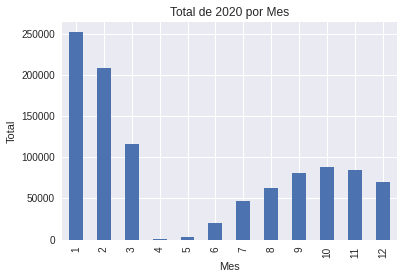

In [115]:
#grafico total de passaportes de 2020, por mes
df_2020.groupby("MES")["QTD"].sum().plot.bar(title="Total de 2020 por Mes")
plt.xlabel("Mes")
plt.ylabel("Total")

In [124]:
#filtrar dados de 2019 para comparar com ano de pandemia
df_2019 = df[df["ANO"] == 2019]

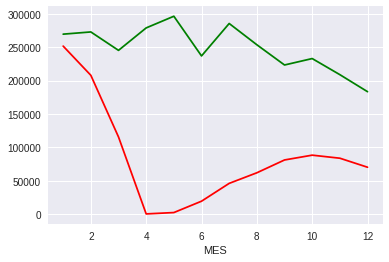

In [125]:
with pd.plotting.plot_params.use("x_compat", True):
    df_2020.groupby("MES")["QTD"].sum().plot(color="r")
    df_2019.groupby("MES")["QTD"].sum().plot(color="g")